In [34]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)

# Reading in the data
stock_data = pd.read_csv("stock_data.csv", parse_dates = ["Date"], index_col = ["Date"])
benchmark_data = pd.read_csv("benchmark_data.csv", parse_dates = ["Date"], index_col = ["Date"]).dropna()

In [35]:
# Display summary for stock_data
print('Stocks\n')

stock_data.info()
stock_data.head()
# Display summary for benchmark_data
print('\nBenchmarks\n')

benchmark_data.info()
benchmark_data.head()
benchmark_data.dtypes

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-04-01 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-04-01 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


S&P 500    float64
dtype: object

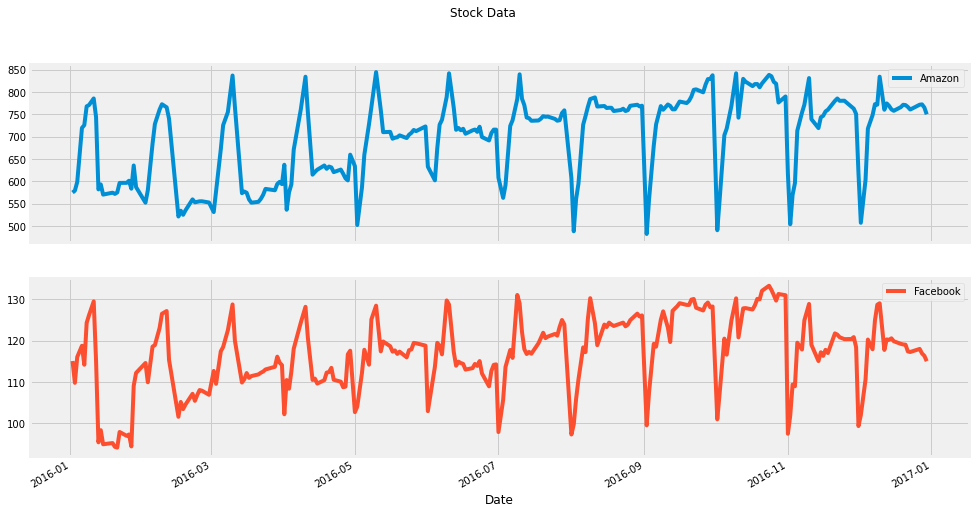

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


In [36]:
# visualize the stock_data
stock_data.plot(title="Stock Data", subplots=True)
plt.show()

# summarize the stock_data
stock_data.describe()

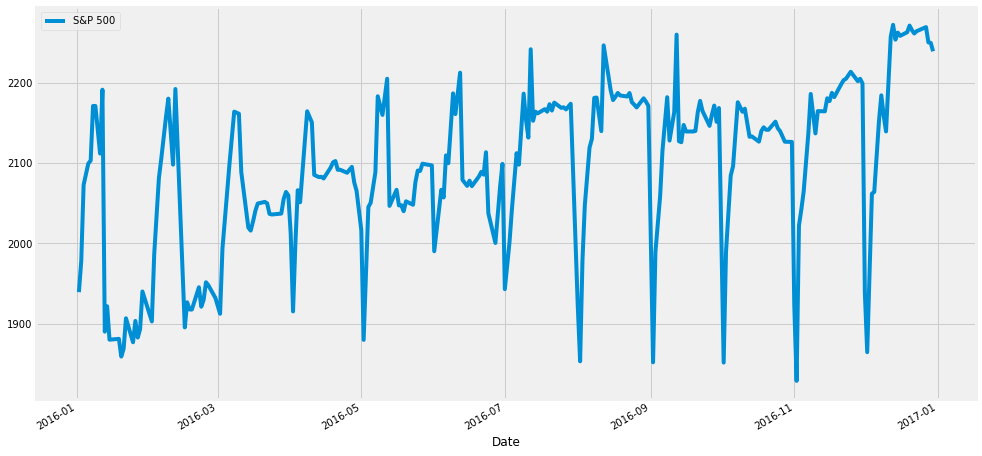

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


In [37]:
# plot the benchmark_data
benchmark_data.plot()
plt.show()

# summarize the benchmark_data
benchmark_data.describe()

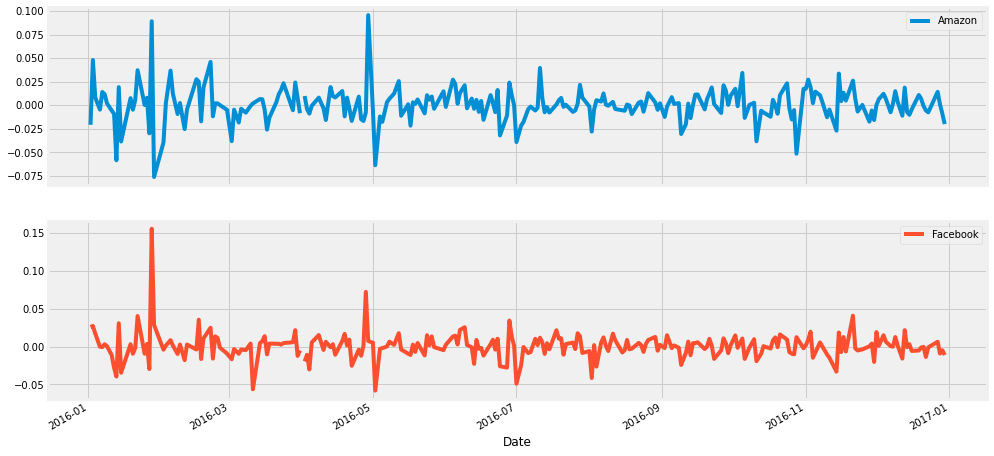

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


In [38]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# plot the daily returns
stock_returns.plot(subplots=True)
plt.show()

# summarize the daily returns
stock_returns.describe()

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

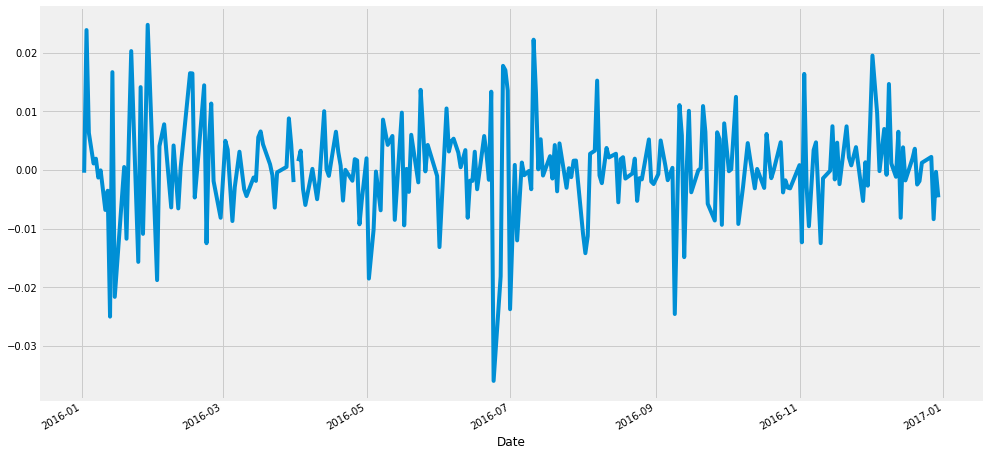

In [39]:
# calculate daily benchmark_data returns
sp_returns = benchmark_data["S&P 500"].pct_change()

# plot the daily returns
sp_returns.plot()
plt.plot()

# summarize the daily returns
sp_returns.describe()

Date
2016-04-01         NaN
2016-05-01    0.002012
2016-06-01   -0.013115
2016-07-01   -0.023700
2016-08-01   -0.010838
Name: S&P 500, dtype: float64

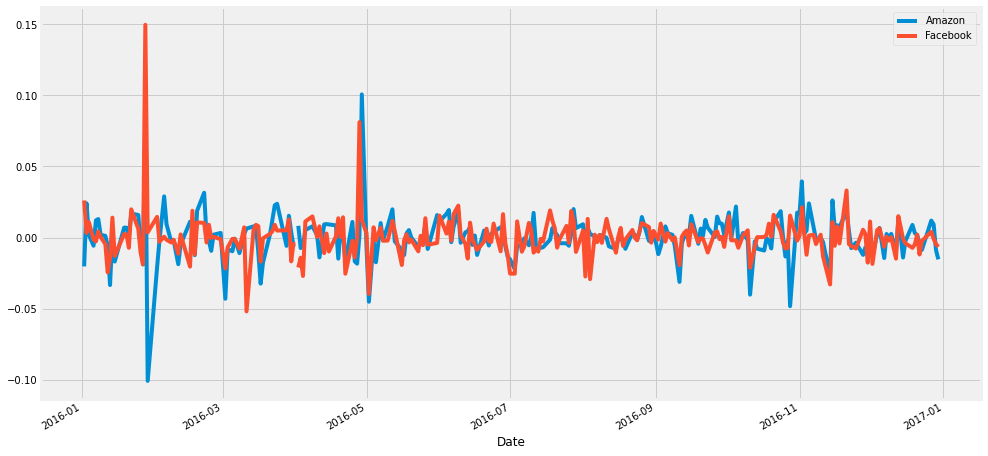

In [40]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

# plot the excess_returns
excess_returns.plot()
plt.plot()

# summarize the excess_returns
excess_returns.describe()
sp_returns.head()

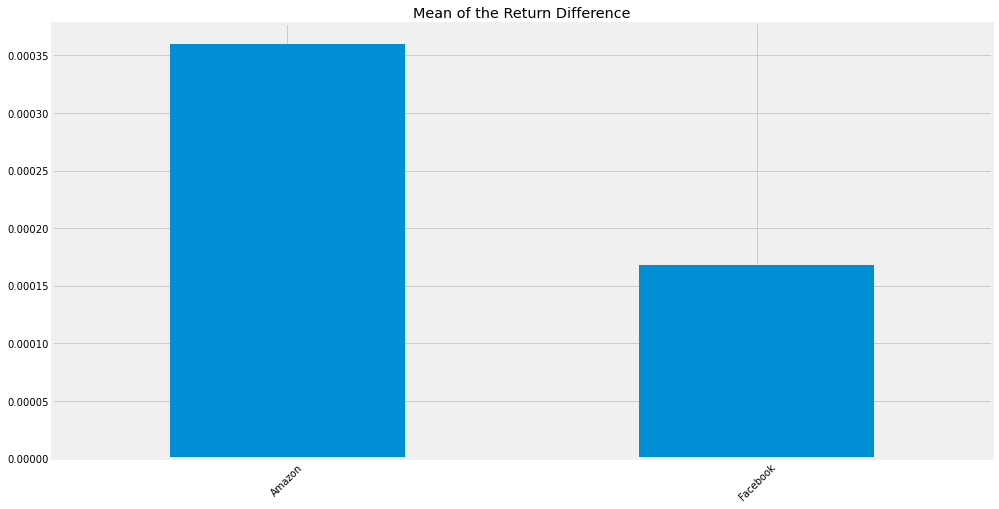

,Amazon,Facebook
Date,,
2016-04-01,NaN,NaN
2016-05-01,-0.007036,0.002977
2016-06-01,0.011317,0.015452
2016-07-01,-0.015358,-0.025343
2016-08-01,0.009374,0.004813


In [41]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Mean of the Return Difference')
plt.xticks(rotation=45)
plt.show()

# plot avg_excess_returns
excess_returns.head()

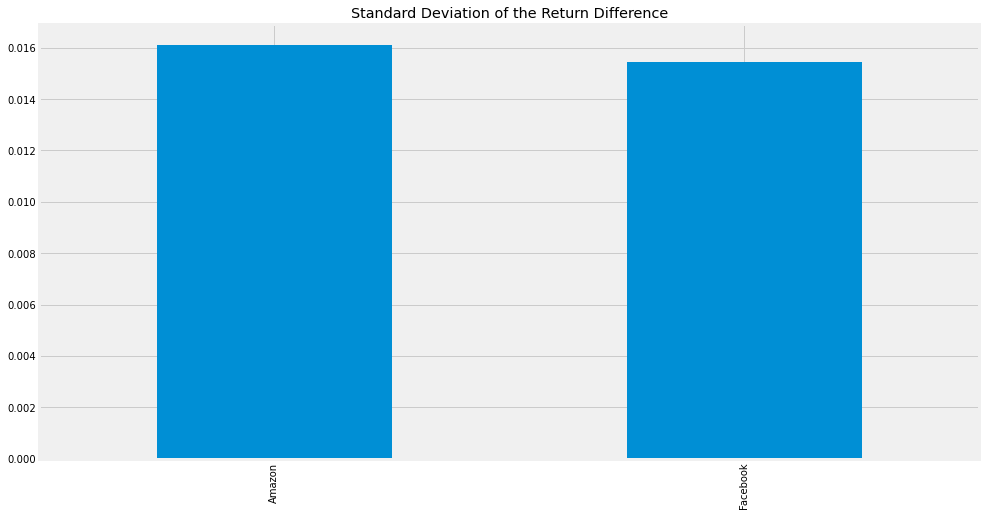

,Amazon,Facebook
Date,,
2016-04-01,NaN,NaN
2016-05-01,-0.007036,0.002977
2016-06-01,0.011317,0.015452
2016-07-01,-0.015358,-0.025343
2016-08-01,0.009374,0.004813


In [42]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')
plt.show()

# plot the standard deviations
excess_returns.head()

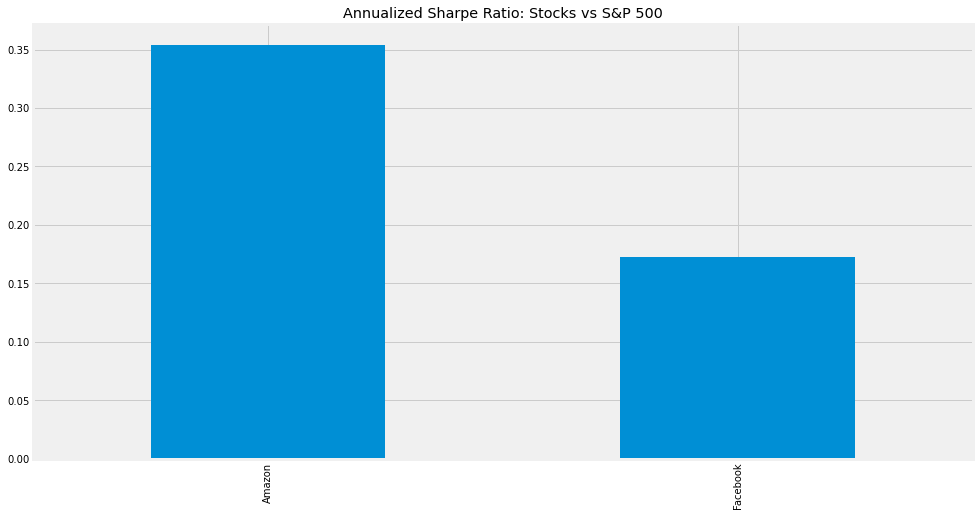

Amazon      0.354283
Facebook    0.172329
dtype: float64

In [43]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')
plt.show()

# plot the annualized sharpe ratio
annual_sharpe_ratio.head()

In [44]:
buy_amazon = True